In [2]:
import librosa, librosa.display
import matplotlib.pyplot as plt

file = "Ed Sheeran - Tenerife Sea.wav"

#Waveform
# https://librosa.org/doc/main/generated/librosa.load.html
# Audio will be automatically resampled to the given rate (default sr=22050).
# Explicit Parameter => sr=22050

signal, sample_rate = librosa.load(file, sr=22050)
# Signal = (sr or Sample Rate) * (T or Duration of the audio)

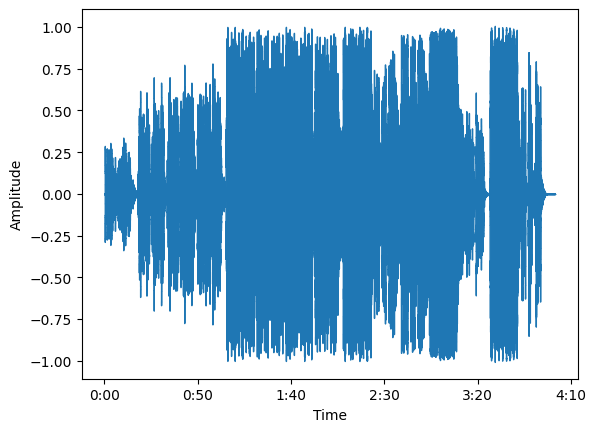

241.44113378684807


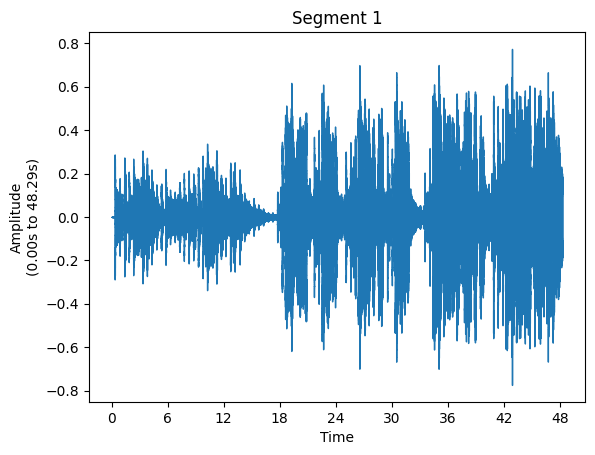

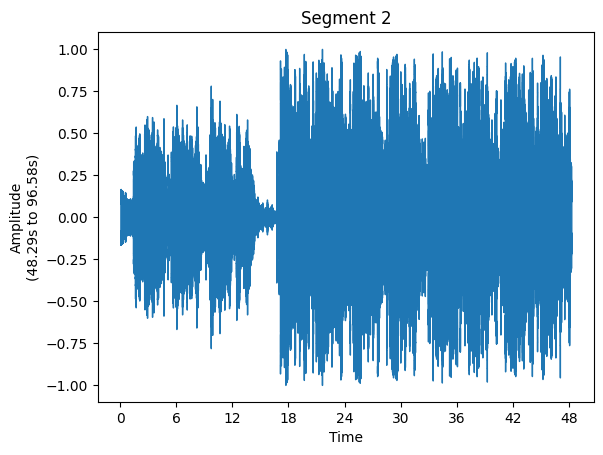

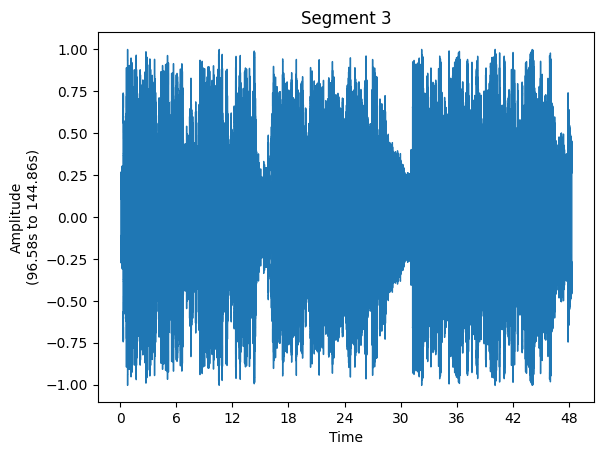

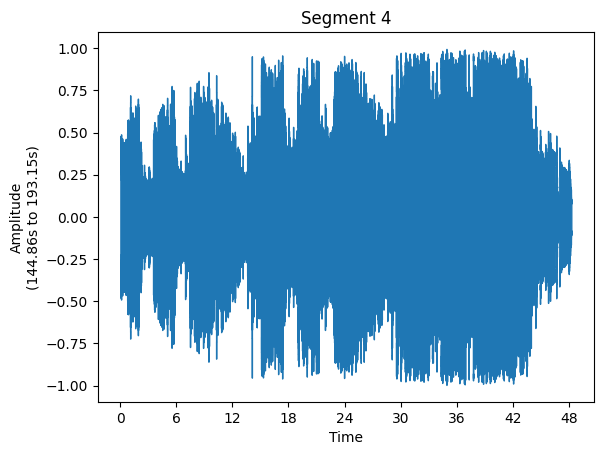

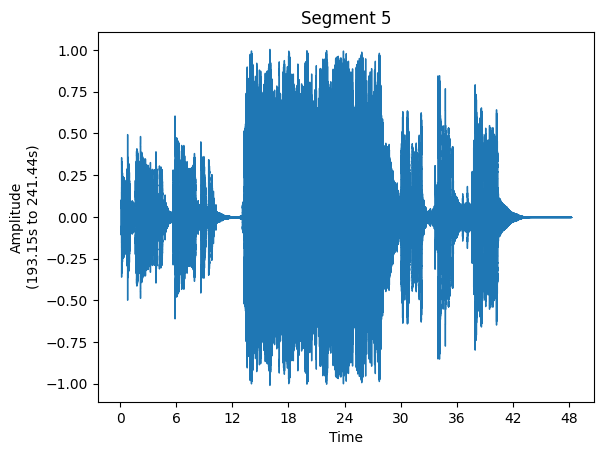

In [ ]:
librosa.display.waveshow(signal, sr=sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# "_process_segment" Visualization
num_segments = 5
duration = librosa.get_duration(y=signal,sr=sample_rate)
print(duration)
samples_per_track = sample_rate * duration
num_sample_per_segment = int(samples_per_track / num_segments)# Overall number per segment
for segment in range(num_segments):
    start_sample = num_sample_per_segment * segment
    finish_sample = start_sample + num_sample_per_segment

    # Calculate time in seconds for yLabel
    start_time = start_sample / sample_rate
    finish_time = finish_sample / sample_rate

    # Plot the wave
    plt.figure()
    librosa.display.waveshow(signal[start_sample:finish_sample], sr=sample_rate)
    plt.xlabel("Time")
    plt.ylabel(f"Amplitude\n({start_time:.2f}s to {finish_time:.2f}s)")  # Customized yLabel
    plt.title(f"Segment {segment + 1}")
    plt.show()

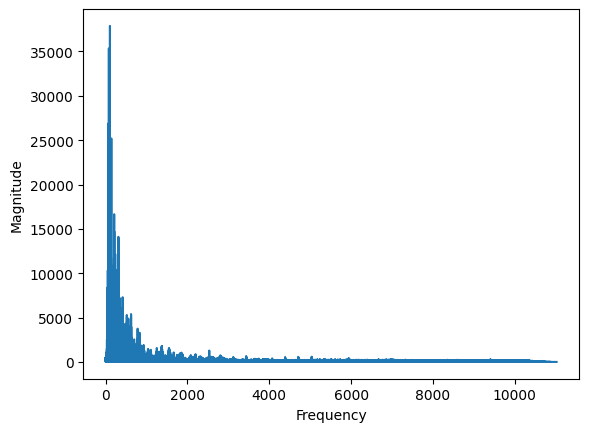

In [3]:
# Fast Fourier Transform => Power Spectrum
import numpy as np
fast_fourier_transform = np.fft.fft(signal) # output: contains complex value 
"""
Taking the absolute value simplifies the FFT result by focusing only on the frequency magnitudes, effectively removing the complex phase information.
"""
magnitude = np.abs(fast_fourier_transform)
# Generate the frequency bins corresponding to the FFT result.
# np.linspace(start, stop, num) creates evenly spaced values:
# - start: 0 (frequency starts at 0 Hz)
# - stop: sample_rate (frequency ends at the sampling rate, e.g., 22050 Hz)
# - num: len(magnitude) (the number of bins matches the length of the FFT result)
# This maps each index in the FFT result to its corresponding frequency.
frequency = np.linspace(0, sample_rate, len(magnitude))

# The result of the Fourier Transform (FT) will always be a Hermitian-symmetric array.
# This means that the right half of the array (for real-valued signals) is a mirror image of the left half.
# Specifically, the negative frequency components are the complex conjugates of the positive frequencies.
# Therefore, the information in the right half of the spectrum is redundant and doesn't provide any additional
# useful information for analysis, so we can discard it.

# We extract only the left half of the frequency and magnitude arrays:
# - The left half represents the positive frequencies, which contain all the necessary information for real signals.
# - The `frequency[:int(len(frequency)/2)]` takes the first half of the frequency array.
# - The `magnitude[:int(len(magnitude)/2)]` takes the corresponding first half of the magnitude array.
# This leaves us with the relevant frequency and magnitude data that corresponds to the positive frequencies
# of the original signal.

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]


plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

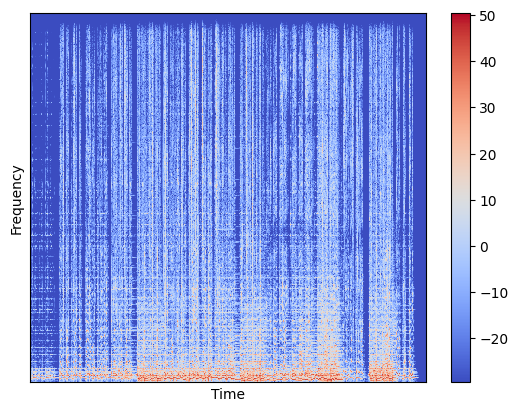

In [4]:
# Short Time Fourier Transform => Spectrogram
# https://librosa.org/doc/main/generated/librosa.stft.html
# Says, "The default value, n_fft=2048 -- "

n_fft = 2048  # FFT window size
hop_length = 512  # Hop length (default is often half of n_fft) By OpenAI
# Compute the Short-Time Fourier Transform (STFT) of the signal.

# The STFT decomposes the signal into overlapping frames, each analyzed using FFT.
# The result is a complex-valued array representing both frequency amplitude and phase.
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

# Compute the magnitude of the STFT by taking the absolute value.
# This removes the phase information and focuses on the strength (amplitude) of the frequency components.
spectrogram = np.abs(stft)

# https://stackoverflow.com/questions/5730778/sound-spectrogram

# Convert the spectrogram to a logarithmic scale (dB scale).
# This compresses the dynamic range and makes the spectrogram more visually interpretable.
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# Display the log-scaled spectrogram, making it easier to analyze the frequency content.
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

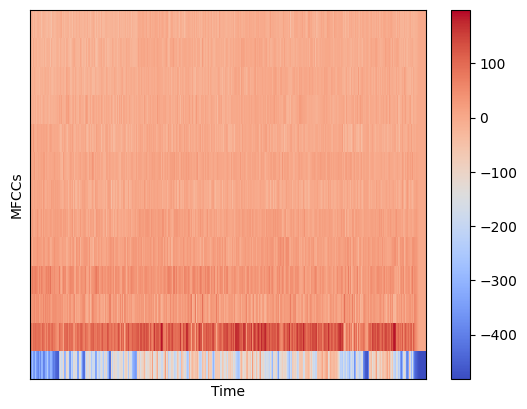

In [ ]:
# Mel-frequency cepstral coefficients (MFCCs)
# https://librosa.org/doc/0.10.2/generated/librosa.feature.mfcc.html#librosa.feature.mfcc
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCCs")
plt.colorbar()
plt.show()